# Sentiment of Discussion Thread Versus IMBD Score

In [11]:
from requests import get
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import re
import sys

unique_Id_List = ['gsd0t', 'gwlcx', 'h1otp', 'h70vv', 'hc5ts', 'hhn7n', 'hnvkl', 'hry6g', 'hxiwe', 'i3z96,'
                    'roo4f', 's00ti', 'sbgek', 'snedo', 'syuft', 'tafrr', 'tl9i8', 'twns8', 'u7dgj', 'uj7zb',
                    '1be1x3', '1bvp25', '1ccx1t', '1cu0rx', '1db0of', '1drfve', '1e7q6c', '1enxeb', '1fjuiv', '1g0iz9',
                    '22dyc7', '22yrz0',  '23jx2l', '245c4b', '24qjb3', '25bla1', '25znwn', '275txi', '27qwbt', '28buqa',
                    '32e9uc', '336stg', '33zfzq', '34s2jz', '35jweb', '36bnvu', '375l8f', '3812yb', '38z67y', '39v7w7',
                    '4gb8j3', '4hdflw', '4ihick', '4jj4n1', '4klpws', '4lndyk', '4mqo0s', '4nthy1', '4owdkh', '4q0yeg',
                    '6nq82n', '6p5hhf', '6qlhfg', '6s2j7s', '6tjeos', '6uzyau', '6wgibh', 'bd6ngg', 'bf3nsm', 'bhhnvj', 'bkdxfl', 'bn6xey', 'bqkmxk']

# Comment Aggregation

In [12]:
all_commentsblob = []
for identifier in unique_Id_List:
    all_commentsblob.append(get('https://api.pushshift.io/reddit/comment/search/?link_id='+identifier+'&limit=100000'))

# Comment Analysis

In [21]:
analyzer = SentimentIntensityAnalyzer()
list_of_clean = []
neg = 0
neu = 0
pos = 0
compound = 0
count = 0
allcommentscore = 0
fp = open("scoredump.txt", 'w')
filedump = []
for list_of_comments in all_commentsblob:
    saved = list_of_comments
    list_of_comments = list_of_comments.text.split("{")

    for comment in list_of_comments:
        if re.search("\"body\"", comment) is not None:
            singleComment = re.search("\"body\": .*\"", comment).group(0)
            if singleComment == "\"body\": \"[deleted]\"":
                continue
            singleComment = singleComment[9:-1]


            list_of_clean.append(singleComment)

            scores = analyzer.polarity_scores(singleComment)
            neg = neg + (scores['neg'])
            neu = neu + (scores['neu'])
            pos = pos + (scores['pos'])
            compound = compound + (scores['compound'])
            count = count + 1
            
    neg = neg/count
    neu = neu/count
    pos = pos/count
    compound = compound/count
    fp.write(str(neg) + " " + str(neu) + " " + str(pos) + " " + str(compound) + " " + str(count))
    if (saved != all_commentsblob[-1]):
        fp.write(", ")
    neg = 0
    neu = 0
    pos = 0
    compound = 0
    count = 0

fp.close()


# Visualization

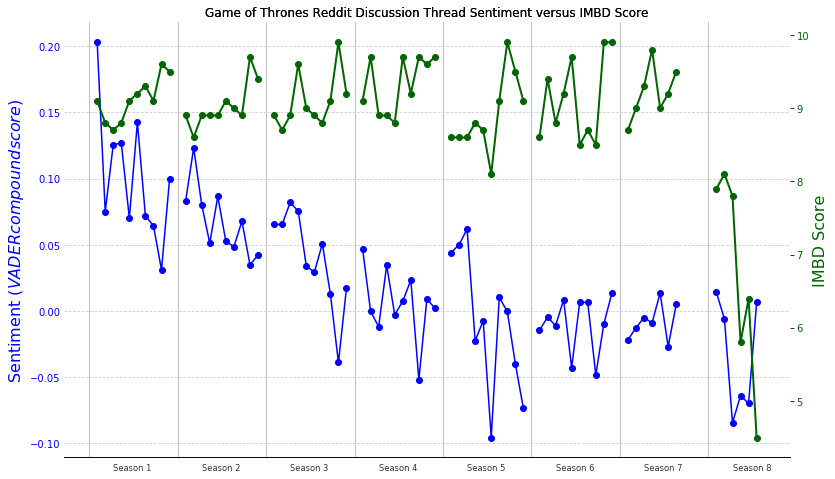

In [22]:
fig, ax1 = plt.subplots(figsize=(13,8))
plt.title('Game of Thrones Reddit Discussion Thread Sentiment versus IMBD Score')

fp = open("scoredump.txt", 'r')
fileContent = fp.read()

# Cleaning Data
toPlot = []
somelist = fileContent.split(',')
seasonSize = [10,10,10,10,10,10,7,6]
s = 0
count = 0
shortSeason = 6
toPlot.append(None)
for item in somelist:
    if (count == seasonSize[s]):
        toPlot.append(None)
        count = 0
        if (s == shortSeason):
            toPlot.append(None)
            toPlot.append(None)
            toPlot.append(None)
        s  = s + 1
    dataforepisode = item.split(' ')
    compound = dataforepisode[4]
    toPlot.append(compound)
    count = count + 1

# Plotting
ax1.plot(toPlot, marker='o', color='blue', label = 'Square')
ax1.set_ylabel(r"Sentiment $(VADER compound score)$", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot([None, 9.1, 8.8, 8.7, 8.8, 9.1, 9.2, 9.3, 9.1, 9.6, 9.5, None, 8.9, 8.6, 8.9, 8.9, 8.9, 9.1, 9.0, 8.9, 9.7, 9.4, None, 8.9, 8.7, 8.9, 9.6, 9.0, 8.9, 8.8, 9.1, 9.9, 9.2, None, 9.1, 9.7, 8.9, 8.9, 8.8, 9.7, 9.2, 9.7, 9.6, 9.7, None, 8.6, 8.6, 8.6, 8.8, 8.7, 8.1, 9.1, 9.9, 9.5, 9.1, None, 8.6, 9.4, 8.8, 9.2, 9.7, 8.5, 8.7, 8.5, 9.9, 9.9, None, 8.7, 9.0, 9.3, 9.8, 9.0, 9.2, 9.5, None, None, None, None,7.9, 8.1, 7.8, 5.8, 6.4, 4.5], lw=2, marker='o', color="darkgreen")
ax2.set_ylabel(r"IMBD Score", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")
plt.title('Game of Thrones Reddit Discussion Thread Sentiment versus IMBD Score')


seasons = 8
i = 0
while i < seasons:
    i = i+1
    ax1.text(11*i-8, -0.12,'Season ' + str(i),  size="small", color='#333333')

ax1.tick_params(which='both', direction='in', bottom=False, labelbottom=False, left=False)

ax1.yaxis.grid(color='#cccccc', linestyle='--', zorder=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.grid(True)

loc = plticker.MultipleLocator(base=11.0) # puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)

fp.close()
plt.show()